In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#nltk.download("vader_lexicon")
#nltk.download('omw-1.4')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
#nltk.download('punkt')
#from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_csv('BA_reviews.csv', index_col=0)

In [3]:
df.head()

,date,summary,reviews
0,17th January 2023,"""a good drinks and food service""",✅ Trip Verified | Easy check in and staff mem...
1,17th January 2023,"""you should let me use the lounge""",✅ Trip Verified | Being a silver flyer and bo...
2,16th January 2023,"""I find BA incredibly tacky""",Not Verified | I find BA incredibly tacky and...
3,9th January 2023,"""This flight was so disappointing""",✅ Trip Verified | Flew ATL to LHR 8th Jan 202...
4,8th January 2023,"""just an average airline""",Not Verified | Great thing about British Airw...


In [4]:
df.tail()

,date,summary,reviews
3452,29th August 2012,British Airways customer review,Flew LHR - VIE return operated by bmi but BA a...
3453,28th August 2012,British Airways customer review,LHR to HAM. Purser addresses all club passenge...
3454,12th October 2011,British Airways customer review,My son who had worked for British Airways urge...
3455,11th October 2011,British Airways customer review,London City-New York JFK via Shannon on A318 b...
3456,9th October 2011,British Airways customer review,SIN-LHR BA12 B747-436 First Class. Old aircraf...


In [5]:
df2=df.copy()

In [6]:
def remove_verified(text):
    if "|" in text:
        text = text.split("|", 1)[1]
        return text
    else:
        return text

# Apply the function to the 'text' column
df2['reviews'] = df2['reviews'].apply(remove_verified)
df2.head()

,date,summary,reviews
0,17th January 2023,"""a good drinks and food service""",Easy check in and staff member was polite an...
1,17th January 2023,"""you should let me use the lounge""",Being a silver flyer and booking a flight th...
2,16th January 2023,"""I find BA incredibly tacky""",I find BA incredibly tacky and constantly lo...
3,9th January 2023,"""This flight was so disappointing""",Flew ATL to LHR 8th Jan 2023. Was unlucky en...
4,8th January 2023,"""just an average airline""",Great thing about British Airways A380 is th...


In [7]:
#df2[df2["reviews"].str.startswith('I')] just a check

In [8]:
df2["date"] = pd.to_datetime(df["date"])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3457 entries, 0 to 3456
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3457 non-null   datetime64[ns]
 1   summary  3457 non-null   object        
 2   reviews  3457 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 108.0+ KB


In [9]:
df2["reviews_norm"]=df2["reviews"].str.lower() #lower form

In [10]:
df2["rev_ws"]=df2["reviews_norm"].str.replace("[^\w\s]","", regex=True) #Remove special chars. ws-without stopwords
df2

,date,summary,reviews,reviews_norm,rev_ws
0,2023-01-17,"""a good drinks and food service""",Easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...
1,2023-01-17,"""you should let me use the lounge""",Being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...
2,2023-01-16,"""I find BA incredibly tacky""",I find BA incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...
3,2023-01-09,"""This flight was so disappointing""",Flew ATL to LHR 8th Jan 2023. Was unlucky en...,flew atl to lhr 8th jan 2023. was unlucky en...,flew atl to lhr 8th jan 2023 was unlucky eno...
4,2023-01-08,"""just an average airline""",Great thing about British Airways A380 is th...,great thing about british airways a380 is th...,great thing about british airways a380 is th...
...,...,...,...,...,...
3452,2012-08-29,British Airways customer review,Flew LHR - VIE return operated by bmi but BA a...,flew lhr - vie return operated by bmi but ba a...,flew lhr vie return operated by bmi but ba ai...
3453,2012-08-28,British Airways customer review,LHR to HAM. Purser addresses all club passenge...,lhr to ham. purser addresses all club passenge...,lhr to ham purser addresses all club passenger...
3454,2011-10-12,British Airways customer review,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...
3455,2011-10-11,British Airways customer review,London City-New York JFK via Shannon on A318 b...,london city-new york jfk via shannon on a318 b...,london citynew york jfk via shannon on a318 bu...


In [11]:
df2["rev_wn"]=df2["rev_ws"].str.replace("[\d+]","", regex=True) #wn - without num
df2

,date,summary,reviews,reviews_norm,rev_ws,rev_wn
0,2023-01-17,"""a good drinks and food service""",Easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...
1,2023-01-17,"""you should let me use the lounge""",Being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...
2,2023-01-16,"""I find BA incredibly tacky""",I find BA incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...
3,2023-01-09,"""This flight was so disappointing""",Flew ATL to LHR 8th Jan 2023. Was unlucky en...,flew atl to lhr 8th jan 2023. was unlucky en...,flew atl to lhr 8th jan 2023 was unlucky eno...,flew atl to lhr th jan was unlucky enough t...
4,2023-01-08,"""just an average airline""",Great thing about British Airways A380 is th...,great thing about british airways a380 is th...,great thing about british airways a380 is th...,great thing about british airways a is the e...
...,...,...,...,...,...,...
3452,2012-08-29,British Airways customer review,Flew LHR - VIE return operated by bmi but BA a...,flew lhr - vie return operated by bmi but ba a...,flew lhr vie return operated by bmi but ba ai...,flew lhr vie return operated by bmi but ba ai...
3453,2012-08-28,British Airways customer review,LHR to HAM. Purser addresses all club passenge...,lhr to ham. purser addresses all club passenge...,lhr to ham purser addresses all club passenger...,lhr to ham purser addresses all club passenger...
3454,2011-10-12,British Airways customer review,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...
3455,2011-10-11,British Airways customer review,London City-New York JFK via Shannon on A318 b...,london city-new york jfk via shannon on a318 b...,london citynew york jfk via shannon on a318 bu...,london citynew york jfk via shannon on a but h...


In [12]:
def rem_stop(text):
    stop=stopwords.words('english')
    stop.extend(["th","nd","rd","st"])
    final=[]
    for word in word_tokenize(text):
        if word not in stop:
            final.append(word)
    return " ".join(final)

df2["rev_ns"]=df2["rev_wn"].apply(rem_stop)
df2

,date,summary,reviews,reviews_norm,rev_ws,rev_wn,rev_ns
0,2023-01-17,"""a good drinks and food service""",Easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check staff member polite helpful made sp...
1,2023-01-17,"""you should let me use the lounge""",Being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,silver flyer booking flight ba dublin would th...
2,2023-01-16,"""I find BA incredibly tacky""",I find BA incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,find ba incredibly tacky constantly looking wa...
3,2023-01-09,"""This flight was so disappointing""",Flew ATL to LHR 8th Jan 2023. Was unlucky en...,flew atl to lhr 8th jan 2023. was unlucky en...,flew atl to lhr 8th jan 2023 was unlucky eno...,flew atl to lhr th jan was unlucky enough t...,flew atl lhr jan unlucky enough board year old...
4,2023-01-08,"""just an average airline""",Great thing about British Airways A380 is th...,great thing about british airways a380 is th...,great thing about british airways a380 is th...,great thing about british airways a is the e...,great thing british airways economy section up...
...,...,...,...,...,...,...,...
3452,2012-08-29,British Airways customer review,Flew LHR - VIE return operated by bmi but BA a...,flew lhr - vie return operated by bmi but ba a...,flew lhr vie return operated by bmi but ba ai...,flew lhr vie return operated by bmi but ba ai...,flew lhr vie return operated bmi ba aircraft a...
3453,2012-08-28,British Airways customer review,LHR to HAM. Purser addresses all club passenge...,lhr to ham. purser addresses all club passenge...,lhr to ham purser addresses all club passenger...,lhr to ham purser addresses all club passenger...,lhr ham purser addresses club passengers name ...
3454,2011-10-12,British Airways customer review,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...,son worked british airways urged fly british a...
3455,2011-10-11,British Airways customer review,London City-New York JFK via Shannon on A318 b...,london city-new york jfk via shannon on a318 b...,london citynew york jfk via shannon on a318 bu...,london citynew york jfk via shannon on a but h...,london citynew york jfk via shannon really nic...


In [13]:
def remove_oov(text):
    return ' '.join([t for t in text.split() if len(t)>1])
            
df2["rev_ns"]=df2["rev_ns"].apply(remove_oov)
df2

,date,summary,reviews,reviews_norm,rev_ws,rev_wn,rev_ns
0,2023-01-17,"""a good drinks and food service""",Easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check staff member polite helpful made sp...
1,2023-01-17,"""you should let me use the lounge""",Being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,silver flyer booking flight ba dublin would th...
2,2023-01-16,"""I find BA incredibly tacky""",I find BA incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,find ba incredibly tacky constantly looking wa...
3,2023-01-09,"""This flight was so disappointing""",Flew ATL to LHR 8th Jan 2023. Was unlucky en...,flew atl to lhr 8th jan 2023. was unlucky en...,flew atl to lhr 8th jan 2023 was unlucky eno...,flew atl to lhr th jan was unlucky enough t...,flew atl lhr jan unlucky enough board year old...
4,2023-01-08,"""just an average airline""",Great thing about British Airways A380 is th...,great thing about british airways a380 is th...,great thing about british airways a380 is th...,great thing about british airways a is the e...,great thing british airways economy section up...
...,...,...,...,...,...,...,...
3452,2012-08-29,British Airways customer review,Flew LHR - VIE return operated by bmi but BA a...,flew lhr - vie return operated by bmi but ba a...,flew lhr vie return operated by bmi but ba ai...,flew lhr vie return operated by bmi but ba ai...,flew lhr vie return operated bmi ba aircraft a...
3453,2012-08-28,British Airways customer review,LHR to HAM. Purser addresses all club passenge...,lhr to ham. purser addresses all club passenge...,lhr to ham purser addresses all club passenger...,lhr to ham purser addresses all club passenger...,lhr ham purser addresses club passengers name ...
3454,2011-10-12,British Airways customer review,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...,son worked british airways urged fly british a...
3455,2011-10-11,British Airways customer review,London City-New York JFK via Shannon on A318 b...,london city-new york jfk via shannon on a318 b...,london citynew york jfk via shannon on a318 bu...,london citynew york jfk via shannon on a but h...,london citynew york jfk via shannon really nic...


In [14]:
def lemme(text):
    fin=[]
    # Load the spaCy model
    nlp = spacy.load("en_core_web_sm")

    # Create a doc object
    doc = nlp(text)

    # Iterate through the tokens and print the lemma
    for token in doc:
        fin.append(token.lemma_)
        #print(token.text, token.lemma_, token.pos_)

    return " ".join(fin)

df2["lemme"]=df2["rev_ns"].apply(lemme)
df2.head()

,date,summary,reviews,reviews_norm,rev_ws,rev_wn,rev_ns,lemme
0,2023-01-17,"""a good drinks and food service""",Easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check staff member polite helpful made sp...,easy check staff member polite helpful make sp...
1,2023-01-17,"""you should let me use the lounge""",Being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,silver flyer booking flight ba dublin would th...,silver flyer book flight ba dublin would think...
2,2023-01-16,"""I find BA incredibly tacky""",I find BA incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,find ba incredibly tacky constantly looking wa...,find ba incredibly tacky constantly look way g...
3,2023-01-09,"""This flight was so disappointing""",Flew ATL to LHR 8th Jan 2023. Was unlucky en...,flew atl to lhr 8th jan 2023. was unlucky en...,flew atl to lhr 8th jan 2023 was unlucky eno...,flew atl to lhr th jan was unlucky enough t...,flew atl lhr jan unlucky enough board year old...,fly atl lhr jan unlucky enough board year old ...
4,2023-01-08,"""just an average airline""",Great thing about British Airways A380 is th...,great thing about british airways a380 is th...,great thing about british airways a380 is th...,great thing about british airways a is the e...,great thing british airways economy section up...,great thing british airways economy section up...


In [15]:
def sentiment(text):
    vader=SentimentIntensityAnalyzer()
    score=vader.polarity_scores(text)
    return score["compound"]

df2["senti_scores"]=df2["rev_wn"].apply(sentiment)
df2["senti_scores"]=df2["senti_scores"].astype("float")
df2

,date,summary,reviews,reviews_norm,rev_ws,rev_wn,rev_ns,lemme,senti_scores
0,2023-01-17,"""a good drinks and food service""",Easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check staff member polite helpful made sp...,easy check staff member polite helpful make sp...,0.9612
1,2023-01-17,"""you should let me use the lounge""",Being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,silver flyer booking flight ba dublin would th...,silver flyer book flight ba dublin would think...,-0.0387
2,2023-01-16,"""I find BA incredibly tacky""",I find BA incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,find ba incredibly tacky constantly looking wa...,find ba incredibly tacky constantly look way g...,0.7121
3,2023-01-09,"""This flight was so disappointing""",Flew ATL to LHR 8th Jan 2023. Was unlucky en...,flew atl to lhr 8th jan 2023. was unlucky en...,flew atl to lhr 8th jan 2023 was unlucky eno...,flew atl to lhr th jan was unlucky enough t...,flew atl lhr jan unlucky enough board year old...,fly atl lhr jan unlucky enough board year old ...,-0.9836
4,2023-01-08,"""just an average airline""",Great thing about British Airways A380 is th...,great thing about british airways a380 is th...,great thing about british airways a380 is th...,great thing about british airways a is the e...,great thing british airways economy section up...,great thing british airways economy section up...,0.9382
...,...,...,...,...,...,...,...,...,...
3452,2012-08-29,British Airways customer review,Flew LHR - VIE return operated by bmi but BA a...,flew lhr - vie return operated by bmi but ba a...,flew lhr vie return operated by bmi but ba ai...,flew lhr vie return operated by bmi but ba ai...,flew lhr vie return operated bmi ba aircraft a...,fly lhr vie return operate bmi ba aircraft air...,0.9840
3453,2012-08-28,British Airways customer review,LHR to HAM. Purser addresses all club passenge...,lhr to ham. purser addresses all club passenge...,lhr to ham purser addresses all club passenger...,lhr to ham purser addresses all club passenger...,lhr ham purser addresses club passengers name ...,lhr ham purser address club passenger name boa...,0.8720
3454,2011-10-12,British Airways customer review,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...,son worked british airways urged fly british a...,son work british airways urge fly british airw...,0.4516
3455,2011-10-11,British Airways customer review,London City-New York JFK via Shannon on A318 b...,london city-new york jfk via shannon on a318 b...,london citynew york jfk via shannon on a318 bu...,london citynew york jfk via shannon on a but h...,london citynew york jfk via shannon really nic...,london citynew york jfk via shannon really nic...,0.9148


In [16]:
conditions =[(df2["senti_scores"] >=0.5),(df2["senti_scores"] <=-0.05), (df2["senti_scores"]<0.5) & (df2["senti_scores"]>-0.05)]
val=["Positive","Negative", "Neutral"]
df2["sentiment"]=np.select(conditions,val)

In [17]:
display(df2)

,date,summary,reviews,reviews_norm,rev_ws,rev_wn,rev_ns,lemme,senti_scores,sentiment
0,2023-01-17,"""a good drinks and food service""",Easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check in and staff member was polite an...,easy check staff member polite helpful made sp...,easy check staff member polite helpful make sp...,0.9612,Positive
1,2023-01-17,"""you should let me use the lounge""",Being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,being a silver flyer and booking a flight th...,silver flyer booking flight ba dublin would th...,silver flyer book flight ba dublin would think...,-0.0387,Neutral
2,2023-01-16,"""I find BA incredibly tacky""",I find BA incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,i find ba incredibly tacky and constantly lo...,find ba incredibly tacky constantly looking wa...,find ba incredibly tacky constantly look way g...,0.7121,Positive
3,2023-01-09,"""This flight was so disappointing""",Flew ATL to LHR 8th Jan 2023. Was unlucky en...,flew atl to lhr 8th jan 2023. was unlucky en...,flew atl to lhr 8th jan 2023 was unlucky eno...,flew atl to lhr th jan was unlucky enough t...,flew atl lhr jan unlucky enough board year old...,fly atl lhr jan unlucky enough board year old ...,-0.9836,Negative
4,2023-01-08,"""just an average airline""",Great thing about British Airways A380 is th...,great thing about british airways a380 is th...,great thing about british airways a380 is th...,great thing about british airways a is the e...,great thing british airways economy section up...,great thing british airways economy section up...,0.9382,Positive
...,...,...,...,...,...,...,...,...,...,...
3452,2012-08-29,British Airways customer review,Flew LHR - VIE return operated by bmi but BA a...,flew lhr - vie return operated by bmi but ba a...,flew lhr vie return operated by bmi but ba ai...,flew lhr vie return operated by bmi but ba ai...,flew lhr vie return operated bmi ba aircraft a...,fly lhr vie return operate bmi ba aircraft air...,0.9840,Positive
3453,2012-08-28,British Airways customer review,LHR to HAM. Purser addresses all club passenge...,lhr to ham. purser addresses all club passenge...,lhr to ham purser addresses all club passenger...,lhr to ham purser addresses all club passenger...,lhr ham purser addresses club passengers name ...,lhr ham purser address club passenger name boa...,0.8720,Positive
3454,2011-10-12,British Airways customer review,My son who had worked for British Airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...,my son who had worked for british airways urge...,son worked british airways urged fly british a...,son work british airways urge fly british airw...,0.4516,Neutral
3455,2011-10-11,British Airways customer review,London City-New York JFK via Shannon on A318 b...,london city-new york jfk via shannon on a318 b...,london citynew york jfk via shannon on a318 bu...,london citynew york jfk via shannon on a but h...,london citynew york jfk via shannon really nic...,london citynew york jfk via shannon really nic...,0.9148,Positive


In [18]:
df2["sentiment"].value_counts()

Positive    1743
Negative    1361
Neutral      353
Name: sentiment, dtype: int64

## Data Visualization

([<matplotlib.patches.Wedge at 0x1f002425940>,
 [Text(-0.01581197815615524, 1.1998958210389723, 'Positive'),
  Text(-0.3633451581744199, -1.1436696621101767, 'Negative'),
  Text(1.1387826932356782, -0.378383373824611, 'Neutral')],
 [Text(-0.00922365392442389, 0.6999392289394005, '50.4%'),
  Text(-0.21195134226841159, -0.6671406362309364, '39.4%'),
  Text(0.6642899043874789, -0.22072363473102308, '10.2%')])

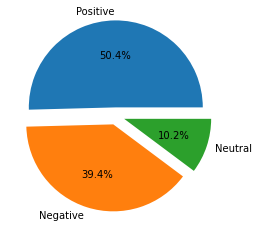

In [19]:
counts=df2['sentiment'].value_counts().to_numpy()
labels =["Positive", "Negative", "Neutral"]
exp = [0.1, 0.1, 0.1]
plt.pie(counts, labels =labels, autopct="%1.1f%%", explode=exp)

## Word Clouds

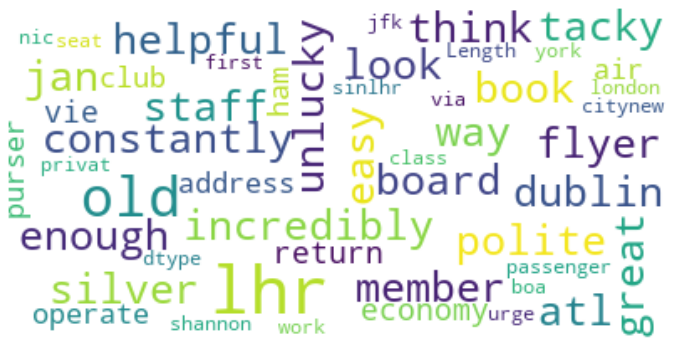

In [20]:
stop=stopwords.words('english')
stop.extend(["british","ba", "airways", "fly", "flight", "aircraft", "name","would", "make", "sp",
            "son","g", "year", "lemme", "find", "airw", "section", "bmi", "really","check","bkk","thing",
            "still"])
wc=WordCloud(background_color='white', stopwords=stop, max_words=50, max_font_size=40, random_state=0).generate(str(df2["lemme"]))

fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

We see a lot of things mentioned in people's reviews. As per the word cloud, lhr is mentioned which is the code for the London - Heathrow airport. Majority of people fly out from lhr through british airways which shows its popularity. We see positive words like easy, helpful, incredibly and polite which could be a description of the British Airways staff or crew. But there are negative words as well such as unlucky, tacky, and old. This shows that some passengers had bad experiences.

In [21]:
pos=df2[df2["sentiment"]=="Positive"]
neg=df2[df2["sentiment"]=="Negative"]

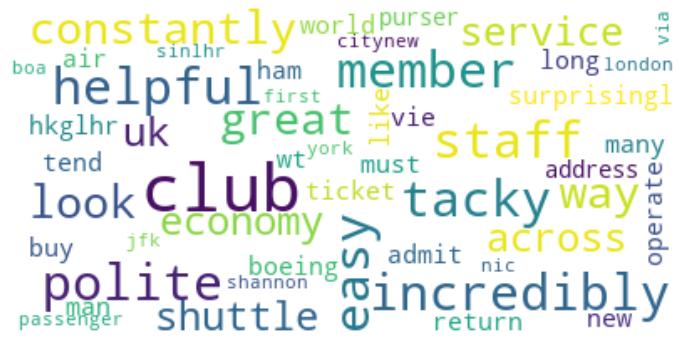

In [22]:
stop.extend(["avoid","lhr"])
wc=WordCloud(background_color='white', stopwords=stop, max_words=50, max_font_size=40, random_state=0).generate(str(pos["lemme"]))

fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Positive Word Cloud
We get a closer look of the words mentioned in the positive reviews more clearly here. Looks like passengers were impressed with the BA club as it has many mentions along with helpful and incredibly.

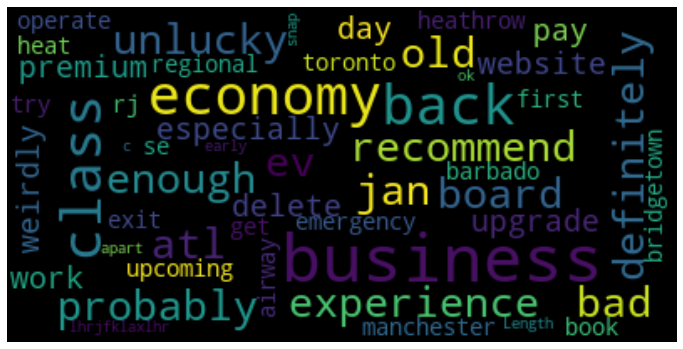

In [23]:
wc=WordCloud(background_color='black', stopwords=stop, max_words=50, max_font_size=40, random_state=0).generate(str(neg["lemme"]))

fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

### Negative Word Cloud
Some Passengers did not have a good experience and have mentioned in their negative reviews about the economy and business class. This also included words on BA's website and airports. We see words like bad, enough, weird and unlucky. We get an idea of what can be improved in the services of BA to ensure customer satisfaction.

In [24]:
#df2.to_csv("Reviews_upd.csv") To save the dataset